In [90]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Analysis

 
(1) check the saved .csv file

(2) remove any entry has province_CN as 'None' string

(3) count how many entries

(4) find the earliest and latest entries

(5) do analysis


In [2]:
df = pd.read_csv('./dataframes/firstStage_train_updatedDatetime.csv') 

In [3]:
len(df)

1710856

In [4]:
dfClean = df[df['province_CN'] != 'None']

In [112]:
len(dfClean)

1328584

In [6]:
dfClean.columns.values

array(['fact', 'lawArticle', 'accusation', 'moneyPunishment',
       'criminalName', 'deathPenalty', 'imprisonment', 'lifeImprisonment',
       'dateTime', 'province_CN', 'province_EN', 'city_CN', 'city_EN',
       'County_CN'], dtype=object)

In [111]:
dfClean.to_csv('./dataframes/firstStage_train_updatedDatetime_clean.csv', index=False)

## Accusation

In [42]:
accuMap = {}
for index, row in dfClean.iterrows():
    accu = row['accusation']
    if accu not in accuMap:
        accuMap[accu] = 0

In [43]:
len(accuMap)

195

In [53]:
proAccuMap = {}
totalCrimeCount = accuMap.copy()

In [54]:
for index, row in dfClean.iterrows():
    prov = row['province_EN']
    accu = row['accusation']
    if prov not in proAccuMap:
        proAccuMap[prov] = accuMap.copy()
    
    proAccuMap[prov][accu] = proAccuMap[prov][accu] + 1
    totalCrimeCount[accu] = totalCrimeCount[accu] + 1


In [55]:
dfAccuProv = pd.DataFrame(proAccuMap)

In [58]:
dfAccuProv2 = dfAccuProv.transpose()

In [71]:
dfAccuProv2

,盗窃,故意伤害,诈骗,虚开增值税专用发票、用于骗取出口退税、抵扣税款发票,强奸,猥亵儿童,寻衅滋事,职务侵占,危险驾驶,强迫交易,...,提供侵入、非法控制计算机信息系统程序、工具,聚众哄抢,组织、领导、参加黑社会性质组织,强迫他人吸毒,徇私舞弊不移交刑事案件,非法买卖、运输、携带、持有毒品原植物种子、幼苗,盗窃、抢夺枪支、弹药、爆炸物、危险物质,窝藏、转移、隐瞒毒品、毒赃,巨额财产来源不明,徇私舞弊不征、少征税款
Hubei,9718,6277,1054,86,85,29,1055,202,8105,7,...,1,0,0,1,1,0,0,0,0,0
Tianjin,3253,3056,617,26,27,4,416,112,3641,2,...,0,0,0,1,1,0,0,0,0,0
Hebei,8030,11408,1739,103,187,28,1655,249,5520,34,...,0,1,0,0,1,0,0,0,0,0
Hunan,12876,5550,1205,98,119,37,1171,150,3438,9,...,0,2,1,0,1,0,0,1,0,1
Guangxi,13851,3412,1106,11,61,25,287,124,2393,5,...,0,7,0,0,0,0,0,2,0,0
Guangdong,23448,10722,2434,129,177,59,2083,995,16456,27,...,1,1,6,0,0,0,0,2,0,0
Gansu,3750,2578,689,14,45,7,223,71,4630,0,...,0,3,0,0,0,0,0,0,0,1
Sichuan,13921,4013,1134,54,184,54,677,175,9027,1,...,2,0,0,2,0,0,0,2,1,0
Zhejiang,41787,10163,3516,417,228,59,2301,498,38632,39,...,3,1,0,1,0,0,1,0,0,0
Shanxi,19920,8477,2994,82,289,38,1167,422,17482,17,...,2,0,2,2,1,0,0,1,0,0


In [72]:
dfAccuProv2.to_csv('province_crime.csv')

In [64]:
totalCrimeCountSorted = sorted(totalCrimeCount.items(), key=lambda s: s[1], reverse=True)

In [65]:
totalCrimeCountSorted

[('盗窃', 298611),
 ('危险驾驶', 265231),
 ('故意伤害', 144930),
 ('交通肇事', 118900),
 ('走私、贩卖、运输、制造毒品', 101735),
 ('容留他人吸毒', 42598),
 ('诈骗', 38356),
 ('寻衅滋事', 24712),
 ('抢劫', 20568),
 ('信用卡诈骗', 15654),
 ('妨害公务', 15002),
 ('非法持有毒品', 14859),
 ('非法持有、私藏枪支、弹药', 12708),
 ('开设赌场', 12565),
 ('受贿', 9100),
 ('掩饰、隐瞒犯罪所得、犯罪所得收益', 8971),
 ('赌博', 8181),
 ('故意毁坏财物', 7539),
 ('抢夺', 7007),
 ('滥伐林木', 6789),
 ('非法拘禁', 6371),
 ('故意杀人', 5947),
 ('生产、销售假药', 5690),
 ('职务侵占', 5688),
 ('组织、强迫、引诱、容留、介绍卖淫', 5585),
 ('合同诈骗', 5296),
 ('贪污', 5248),
 ('敲诈勒索', 4490),
 ('过失致人死亡', 4253),
 ('生产、销售有毒、有害食品', 3616),
 ('强奸', 3528),
 ('聚众斗殴', 3527),
 ('非法占用农用地', 3437),
 ('虚开增值税专用发票、用于骗取出口退税、抵扣税款发票', 3418),
 ('非法吸收公众存款', 3184),
 ('放火', 3130),
 ('行贿', 3003),
 ('失火', 2987),
 ('拒不执行判决、裁定', 2963),
 ('非法制造、买卖、运输、邮寄、储存枪支、弹药、爆炸物', 2827),
 ('伪造、变造、买卖国家机关公文、证件、印章', 2770),
 ('挪用资金', 2635),
 ('非法经营', 2513),
 ('非法行医', 2500),
 ('制造、贩卖、传播淫秽物品', 2443),
 ('生产、销售不符合安全标准的食品', 2426),
 ('拒不支付劳动报酬', 2241),
 ('销售假冒注册商标的商品', 2237),
 ('假冒注册商标', 2177),
 ('盗伐林木

In [79]:
df_totalCrimeCount = pd.DataFrame.from_dict(totalCrimeCount, orient='index')

In [81]:
df_totalCrimeCount.columns = ['count']

In [82]:
df_totalCrimeCount

,count
盗窃,298611
故意伤害,144930
诈骗,38356
虚开增值税专用发票、用于骗取出口退税、抵扣税款发票,3418
强奸,3528
...,...
非法买卖、运输、携带、持有毒品原植物种子、幼苗,5
盗窃、抢夺枪支、弹药、爆炸物、危险物质,1
窝藏、转移、隐瞒毒品、毒赃,11
巨额财产来源不明,2


In [84]:
df_totalCrimeCountSorted = df_totalCrimeCount.sort_values(by='count', ascending=False)

In [109]:
df_totalCrimeCountSorted.to_csv('totalCrimeCountSorted.csv', encoding='utf_8_sig')

,count
盗窃,298611
危险驾驶,265231
故意伤害,144930
交通肇事,118900
走私、贩卖、运输、制造毒品,101735
...,...
强迫他人吸毒,10
非法买卖、运输、携带、持有毒品原植物种子、幼苗,5
巨额财产来源不明,2
徇私舞弊不征、少征税款,2


In [108]:
df_totalCrimeCountSorted.tail(50)

,count
利用影响力受贿,63
非法制造、销售非法制造的注册商标标识,53
盗窃、抢夺枪支、弹药、爆炸物,52
破坏监管秩序,52
窃取、收买、非法提供信用卡信息,48
非法制造、买卖、运输、储存危险物质,46
走私武器、弹药,42
伪造、变造、买卖武装部队公文、证件、印章,40
非法生产、买卖警用装备,39
危险物品肇事,39


In [94]:
import matplotlib.font_manager
matplotlib.font_manager._rebuild()

In [96]:
matplotlib.rcParams['font.family'] = ['Heiti TC']

<ipython-input-104-8df0cc6570e8>:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(df_totalCrimeCountSorted, labels=df_totalCrimeCountSorted.index.values.tolist(), autopct='%1.0f%%')


([<matplotlib.patches.Wedge at 0x11f3c1730>,
 [Text(0.8369875792408563, 0.7137589174199727, '盗窃'),
  Text(-0.49677673889346835, 0.9814340893276384, '危险驾驶'),
  Text(-1.0903803021122007, 0.14515783397979554, '故意伤害'),
  Text(-0.9697837058301298, -0.5191527365875869, '交通肇事'),
  Text(-0.5820381378837524, -0.93339788196075, '走私、贩卖、运输、制造毒品'),
  Text(-0.23605481735565959, -1.074373363036885, '容留他人吸毒'),
  Text(-0.027334636669409253, -1.0996603192068684, '诈骗'),
  Text(0.13635574957936114, -1.0915159685303053, '寻衅滋事'),
  Text(0.2522202108237265, -1.0706936841375478, '抢劫'),
  Text(0.342889694484655, -1.0451921629137009, '信用卡诈骗'),
  Text(0.4176885230309054, -1.0176130392876563, '妨害公务'),
  Text(0.48844150796829994, -0.9856088946908167, '非法持有毒品'),
  Text(0.5516059742151049, -0.9516989278181441, '非法持有、私藏枪支、弹药'),
  Text(0.607461878422157, -0.9170551053583555, '开设赌场'),
  Text(0.6536245901894295, -0.8847456669007769, '受贿'),
  Text(0.6908225025204274, -0.8560165126978652, '掩饰、隐瞒犯罪所得、犯罪所得收益'),
  Text(0.724

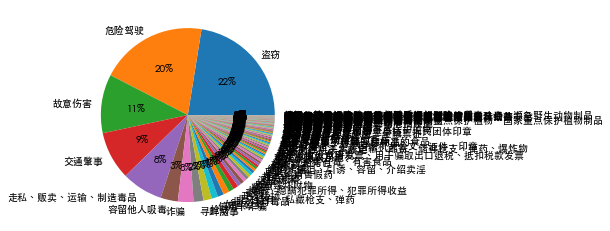

In [104]:
plt.pie(df_totalCrimeCountSorted, labels=df_totalCrimeCountSorted.index.values.tolist(), autopct='%1.0f%%')


/anaconda3/envs/cnCrimes/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc


## Temporal analysis

### (1) Sort based on dateTime

In [7]:
dft = dfClean[dfClean['dateTime'] != '0000-00-01']

In [8]:
dfDateSorted = dft.sort_values(by='dateTime',ascending=True)

In [9]:
dfDateSorted.tail(100)['dateTime']

149988     2103-3-01
1611205    2103-4-01
30933      2103-6-01
576991     2103-6-20
1179615    2103-6-29
             ...    
742434     ２０１７-３-２９
729321     ２０１７-３-２９
723426      ２０１７-４-６
1107643     ２０１７-４-６
1431351    ２０１７-８-１０
Name: dateTime, Length: 100, dtype: object

In [10]:
dfDateSorted.loc[1431351]['fact']

'扶余市人民检察院指控，２０１７年８月１０日１０时许，扶余市公安局交警大队民警郭某、孙某带领辅警王某，周某，李某1，李某2，韩某，雷鸣在扶余市三岔河镇郊新城局村治理大货车改装行动时，发现被告人姜某的儿子刘某1驾驶的吉J９７２２２号豪泺牌重型厢式货车存在改装的行为，欲对该车进行调查时，刘某1不配合弃车逃跑，后交警将刘某1追回，周某欲将该大货车开回扶余市交警大队进一步调查，姜某上前阻拦不让开车，当周某从大货车上下来时，姜某抓住周某将其嘴角打伤，右肩膀及胸部挠伤，并一直辱骂周某。王某，李某1等人上前阻止，姜某又将王某，李某1挠伤。\r\n扶余市人民检察院指控上述犯罪事实所列举的证据有被告人姜某的供述，证人郭某、孙某、王某、周某、李某2、李某1、韩某、雷鸣、于某、任某、刘某2、刘某1的证言，刑事谅解书、证明、抓捕经过、户籍证明等证据材料。并认为，被告人姜某的行为构成××，提请本院应依照《中华人民共和国刑法》××之规定追究其刑事责任。'

In [25]:
dfDateSorted.to_csv('firstStage_train_clean_dateSorted.csv',index=False)

#### Temporal analysis
Early cases date back to 1994 (or even earlier)

Latest case: 2017-8-10 (ish)

Data also contains (1) typos in date, (2) incorrect regexing, some date extracted are date of birth of someone, not the datetime when a case happened.

## Province analysis

In [11]:
dfProCount = dfClean.groupby(['province_CN', 'province_EN']).agg(['count'])

In [12]:
len(dfProCount)

34

In [13]:
dfProCount.columns.values

array([('fact', 'count'), ('lawArticle', 'count'),
       ('accusation', 'count'), ('moneyPunishment', 'count'),
       ('criminalName', 'count'), ('deathPenalty', 'count'),
       ('imprisonment', 'count'), ('lifeImprisonment', 'count'),
       ('dateTime', 'count'), ('city_CN', 'count'), ('city_EN', 'count'),
       ('County_CN', 'count')], dtype=object)

In [14]:
caseCountDict = dfProCount[('fact', 'count')].to_dict()

In [15]:
caseCountDict

{('上海市', 'Shanghai'): 34923,
 ('云南省', 'Yunnan'): 23810,
 ('内蒙古自治区', 'Neimenggu'): 20507,
 ('北京市', 'Beijing'): 29903,
 ('台湾省', 'Taiwan'): 1,
 ('吉林省', 'Jilin'): 37888,
 ('四川省', 'Sichuan'): 53839,
 ('天津市', 'Tianjin'): 17393,
 ('宁夏回族自治区', 'Ningxia'): 6401,
 ('安徽省', 'Anhui'): 48682,
 ('山东省', 'Shandong'): 76951,
 ('山西省', 'Shanxi'): 57803,
 ('广东省', 'Guangdong'): 118221,
 ('广西壮族自治区', 'Guangxi'): 43699,
 ('新疆维吾尔自治区', 'Xinjiang'): 7649,
 ('江苏省', 'Jiangsu'): 111680,
 ('江西省', 'Jiangxi'): 22871,
 ('河北省', 'Hebei'): 48864,
 ('河南省', 'Henan'): 71706,
 ('浙江省', 'Zhejiang'): 140919,
 ('海南省', 'Hainan'): 6438,
 ('湖北省', 'Hubei'): 49188,
 ('湖南省', 'Hunan'): 49030,
 ('澳门特别行政区', 'Aomen'): 9,
 ('甘肃省', 'Gansu'): 21138,
 ('福建省', 'Fujian'): 61099,
 ('西藏自治区', 'Xizang'): 1105,
 ('贵州省', 'Guizhou'): 31814,
 ('辽宁省', 'Liaoning'): 40527,
 ('重庆市', 'Chongqing'): 32876,
 ('陕西省', 'Shanxi'): 25217,
 ('青海省', 'Qinghai'): 2805,
 ('香港特别行政区', 'Xianggang'): 5,
 ('黑龙江省', 'Heilongjiang'): 33623}

In [16]:
sorted(caseCountDict.items(), key=lambda s: s[1])

[(('台湾省', 'Taiwan'), 1),
 (('香港特别行政区', 'Xianggang'), 5),
 (('澳门特别行政区', 'Aomen'), 9),
 (('西藏自治区', 'Xizang'), 1105),
 (('青海省', 'Qinghai'), 2805),
 (('宁夏回族自治区', 'Ningxia'), 6401),
 (('海南省', 'Hainan'), 6438),
 (('新疆维吾尔自治区', 'Xinjiang'), 7649),
 (('天津市', 'Tianjin'), 17393),
 (('内蒙古自治区', 'Neimenggu'), 20507),
 (('甘肃省', 'Gansu'), 21138),
 (('江西省', 'Jiangxi'), 22871),
 (('云南省', 'Yunnan'), 23810),
 (('陕西省', 'Shanxi'), 25217),
 (('北京市', 'Beijing'), 29903),
 (('贵州省', 'Guizhou'), 31814),
 (('重庆市', 'Chongqing'), 32876),
 (('黑龙江省', 'Heilongjiang'), 33623),
 (('上海市', 'Shanghai'), 34923),
 (('吉林省', 'Jilin'), 37888),
 (('辽宁省', 'Liaoning'), 40527),
 (('广西壮族自治区', 'Guangxi'), 43699),
 (('安徽省', 'Anhui'), 48682),
 (('河北省', 'Hebei'), 48864),
 (('湖南省', 'Hunan'), 49030),
 (('湖北省', 'Hubei'), 49188),
 (('四川省', 'Sichuan'), 53839),
 (('山西省', 'Shanxi'), 57803),
 (('福建省', 'Fujian'), 61099),
 (('河南省', 'Henan'), 71706),
 (('山东省', 'Shandong'), 76951),
 (('江苏省', 'Jiangsu'), 111680),
 (('广东省', 'Guangdong'), 118221),
 (('

In [17]:
dfPop = pd.read_csv('./otherData/2010ProvincePopulation.csv') 

In [18]:
ProPopMap = pd.Series(dfPop.Population.values, index=dfPop.Province).to_dict()

In [19]:
casePerTenThousandPpl = {}
for key, value in caseCountDict.items():
    proCN, proEN = key
    caseCount = value
    population = ProPopMap[proEN]
    populationUnit = population // 10000
    p = caseCount / populationUnit
    casePerTenThousandPpl[(proCN, proEN)] = p

In [20]:
sorted(casePerTenThousandPpl.items(), key=lambda s: s[1])

[(('台湾省', 'Taiwan'), 0.0004317789291882556),
 (('香港特别行政区', 'Xianggang'), 0.007082152974504249),
 (('澳门特别行政区', 'Aomen'), 0.16363636363636364),
 (('新疆维吾尔自治区', 'Xinjiang'), 3.507106831728565),
 (('西藏自治区', 'Xizang'), 3.683333333333333),
 (('青海省', 'Qinghai'), 4.9911032028469755),
 (('江西省', 'Jiangxi'), 5.132630161579892),
 (('云南省', 'Yunnan'), 5.18059181897302),
 (('四川省', 'Sichuan'), 6.695560253699789),
 (('河北省', 'Hebei'), 6.800835073068893),
 (('陕西省', 'Shanxi'), 7.061607392887146),
 (('海南省', 'Hainan'), 7.42560553633218),
 (('湖南省', 'Hunan'), 7.464981729598051),
 (('河南省', 'Henan'), 7.626675175494576),
 (('山东省', 'Shandong'), 8.033302014824095),
 (('安徽省', 'Anhui'), 8.181848739495798),
 (('甘肃省', 'Gansu'), 8.266718811106765),
 (('内蒙古自治区', 'Neimenggu'), 8.30242914979757),
 (('湖北省', 'Hubei'), 8.594792940765332),
 (('黑龙江省', 'Heilongjiang'), 8.776559645001305),
 (('贵州省', 'Guizhou'), 9.157743235463442),
 (('辽宁省', 'Liaoning'), 9.265432098765432),
 (('广西壮族自治区', 'Guangxi'), 9.495654063450674),
 (('宁夏回族自治区

## City/County Analysis

In [21]:
dfCounty = dfClean[dfClean['County_CN'] != 'None']

In [22]:
len(dfCounty)

736642

In [23]:
len(dfCounty)  / len(dfClean)

0.5544564739602464

In [ ]:
# accuSum = dfCounty.groupby(['accusation']).agg(['sum'])